# 03. Exploratory Data Analysis (EDA)

In [1]:
import sys
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Add project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

print(f"Project Root: {project_root}")


Project Root: c:\Users\Kaustab das\Desktop\Aadhaar Pulse AI


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# Load Processed Data
processed_path = os.path.join(project_root, 'data', 'processed', 'merged_master_table.csv')
if os.path.exists(processed_path):
    df = pd.read_csv(processed_path)
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
    print(f"Data Loaded: {df.shape}")
else:
    print("Error: Processed data not found. Please run run_pipeline.py first.")


Data Loaded: (2947681, 15)


## 3.1 Demographic Analysis using Source Analytics

,state,age_0_5,age_5_17,age_18_greater,total_enrolment
54,Uttar Pradesh,645906.0,577648.0,20840.0,1244394.0
7,Bihar,321639.0,401171.0,13332.0,736142.0
32,Madhya Pradesh,461697.0,143171.0,11634.0,616502.0
61,West Bengal,341422.0,110672.0,10940.0,463034.0
33,Maharashtra,348588.0,99475.0,9822.0,457885.0


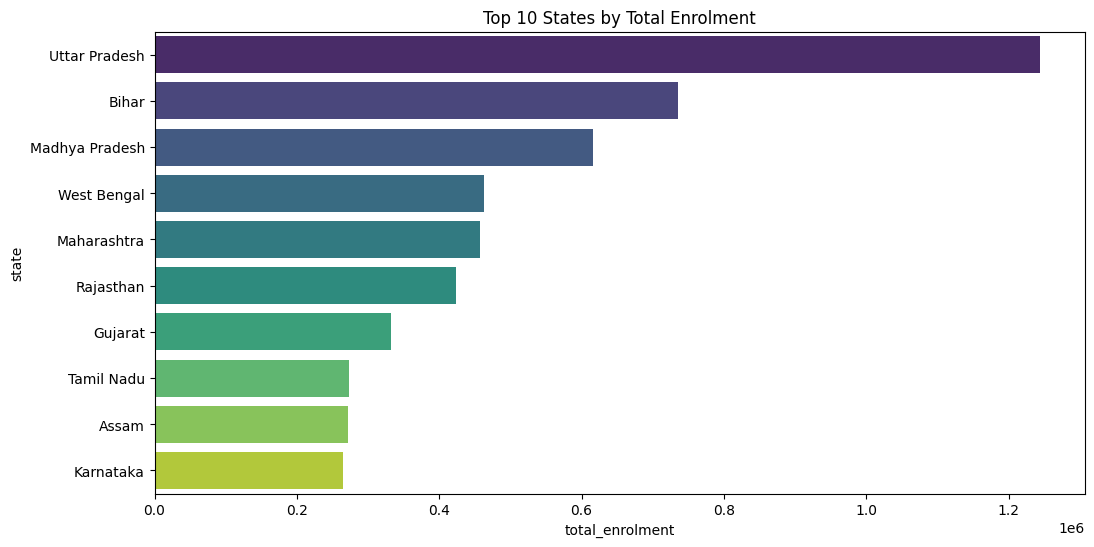

In [4]:
from src.analytics import enrolment_analysis

# State Statistics
state_stats = enrolment_analysis.get_state_enrolment_stats(df)
display(state_stats.head())

# Plot Top 10 States by Enrolment
plt.figure(figsize=(12, 6))
sns.barplot(data=state_stats.head(10), x='total_enrolment', y='state', palette='viridis')
plt.title('Top 10 States by Total Enrolment')
plt.show()


## 3.2 Age Group Distribution

{'0-5 Years': 66.06565465534628, '5-17 Years': 31.030034414558628, '18+ Years': 2.9043109300950896}


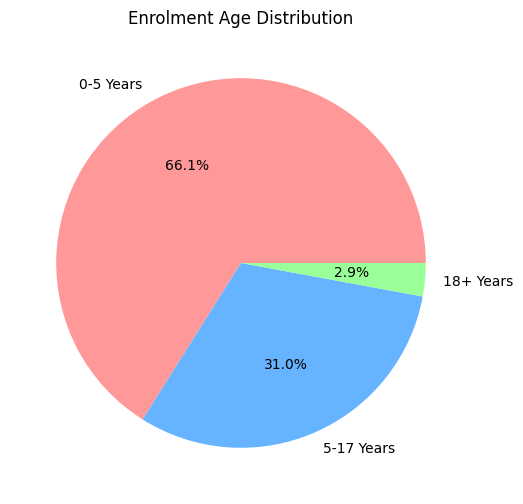

In [5]:
age_dist = enrolment_analysis.get_age_group_distribution(df)
print(age_dist)

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(age_dist.values(), labels=age_dist.keys(), autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Enrolment Age Distribution')
plt.show()
